# #**Exploratory Data Analysis  -  Trial's of Violent Crimes by Courts**


<div class="alert alert-block alert-info">

**EDA: This notebooks explores the basic use of Pandas and will cover the basic commands of Exploratory Data Analysis(EDA) which includes cleaning, munging, combining, reshaping, slicing, dicing, and transforming data for analysis purpose.**

* Exploratory Data Analysis 

Understand the data by EDA and derive simple models with Pandas as baseline. EDA ia a critical and first step in analyzing the data and we do this for below reasons :
> * Finding patterns in Data
> * Determining relationships in Data
> * Checking of assumptions
> * Preliminary selection of appropriate models
> * Detection of mistakes

**Context:**
To understand the Trails of Violent Crime by Court.


**Content:**
Granularity: Annual (State/UT wise) Time period: 2001 - 2010

**Proforma :**
> * Trial of Violent Crimes by Courts
> * Murder
> * Attempt to Murder
> * C H Not Amounting to Murder
> * Rape
> * Kidnapping & Abduction 5.1 Kidnapping & Abduction of Women & Girls 5.2 Kidnapping & Abduction of Others
> * Dacoity
> * Preparation & Assembly for Dacoity
> * Robbery
> * Riots
> * Arson
> * Dowry Deaths

**Acknowledgements:**
__[National Crime Records Bureau (NCRB), Govt of India.](http://http://ncrb.gov.in/)__



<img src="crime scene.gif" alt="Alt text that describes the graphic" title="Title text" />

In [1]:
 # Import packages
import numpy as np                                          # Implemennts milti-dimensional array and matrices
import pandas as pd                                         # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                             # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                       # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output                                 
                                                                               
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: solid;
        border: 3px solid lightgray;
    }
</style>

In [3]:
vc = pd.read_csv("Trial_of_violent_crimes_by_courts.csv")          #loading the file

In [4]:
vc.shape                    # shape of data

(4473, 7)

In [5]:
vc.dtypes            #type of data

Area_Name                                           object
Year                                                 int64
Group_Name                                          object
Sub_Group_Name                                      object
Trial_of_Violent_Crimes_by_Courts_By_Confession    float64
Trial_of_Violent_Crimes_by_Courts_By_trial         float64
Trial_of_Violent_Crimes_by_Courts_Total            float64
dtype: object

In [6]:
vc.info()            # info of data 

#Some missing values can be noted via info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4473 entries, 0 to 4472
Data columns (total 7 columns):
Area_Name                                          4473 non-null object
Year                                               4473 non-null int64
Group_Name                                         4473 non-null object
Sub_Group_Name                                     4473 non-null object
Trial_of_Violent_Crimes_by_Courts_By_Confession    3150 non-null float64
Trial_of_Violent_Crimes_by_Courts_By_trial         4461 non-null float64
Trial_of_Violent_Crimes_by_Courts_Total            4470 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 244.7+ KB


In [7]:

vc.sample(10)               #random sample from dataset count 10


,Area_Name,Year,Group_Name,Sub_Group_Name,Trial_of_Violent_Crimes_by_Courts_By_Confession,Trial_of_Violent_Crimes_by_Courts_By_trial,Trial_of_Violent_Crimes_by_Courts_Total
4162,Andhra Pradesh,2002,TVC- Total,12. Total Trials (Sum of 1-11 Above),2.0,9522.0,9524.0
1876,West Bengal,2010,TVC- Kidnaping of Others,05B. Kidnapping & Abduction of Others,6.0,72.0,78.0
1655,West Bengal,2003,TVC- Kidnaping of Others,05B. Kidnapping & Abduction of Others,0.0,112.0,112.0
3761,Nagaland,2009,TVC- Riots,09. Riots,1.0,2.0,3.0
759,Himachal Pradesh,2004,TVC- C.H. not Amounting to Murder,03. C H Not Amounting to Murder,0.0,8.0,8.0
2850,Madhya Pradesh,2010,TVC- Murder,01. Murder,NaN,2118.0,2118.0
3758,Manipur,2009,TVC- Riots,09. Riots,0.0,0.0,0.0
3826,Odisha,2001,TVC- Robbery,08. Robbery,0.0,717.0,717.0
1116,Uttarakhand,2005,TVC- Dacoity,06. Dacoity,NaN,13.0,13.0
2514,Mizoram,2010,TVC- Kidnapping of Women & Girls,05A. Kidnapping & Abduction of Women & Girls,0.0,0.0,0.0


In [8]:
vc.head()              #head of data, defaulted to count 5

,Area_Name,Year,Group_Name,Sub_Group_Name,Trial_of_Violent_Crimes_by_Courts_By_Confession,Trial_of_Violent_Crimes_by_Courts_By_trial,Trial_of_Violent_Crimes_by_Courts_Total
0,Andhra Pradesh,2001,TVC- Arson,10. Arson,20.0,517.0,537.0
1,Arunachal Pradesh,2001,TVC- Arson,10. Arson,0.0,3.0,3.0
2,Assam,2001,TVC- Arson,10. Arson,5.0,142.0,147.0
3,Bihar,2001,TVC- Arson,10. Arson,0.0,208.0,208.0
4,Chandigarh,2001,TVC- Arson,10. Arson,0.0,3.0,3.0


In [9]:
vc.tail()             #tail of data, defaulted to count 5

#rows with total can be seen, optional to remove

,Area_Name,Year,Group_Name,Sub_Group_Name,Trial_of_Violent_Crimes_by_Courts_By_Confession,Trial_of_Violent_Crimes_by_Courts_By_trial,Trial_of_Violent_Crimes_by_Courts_Total
4468,Tamil Nadu,2010,TVC- Total,12. Total Trials (Sum of 1-11 Above),69.0,6773.0,6842.0
4469,Tripura,2010,TVC- Total,12. Total Trials (Sum of 1-11 Above),6.0,401.0,407.0
4470,Uttar Pradesh,2010,TVC- Total,12. Total Trials (Sum of 1-11 Above),0.0,23364.0,23364.0
4471,Uttarakhand,2010,TVC- Total,12. Total Trials (Sum of 1-11 Above),NaN,1036.0,1036.0
4472,West Bengal,2010,TVC- Total,12. Total Trials (Sum of 1-11 Above),38.0,5220.0,5258.0


In [10]:
vc.describe(include = 'all')           # describe data set

,Area_Name,Year,Group_Name,Sub_Group_Name,Trial_of_Violent_Crimes_by_Courts_By_Confession,Trial_of_Violent_Crimes_by_Courts_By_trial,Trial_of_Violent_Crimes_by_Courts_Total
count,4473,4473.000000,4473,4473,3150.000000,4461.000000,4470.000000
unique,35,NaN,14,14,NaN,NaN,NaN
top,Gujarat,NaN,TVC- Total,12. Total Trials (Sum of 1-11 Above),NaN,NaN,NaN
freq,140,NaN,346,346,NaN,NaN,NaN
mean,NaN,2005.509278,NaN,NaN,14.069206,660.333557,668.918568
std,NaN,2.861356,NaN,NaN,80.814697,1947.276297,1956.952498
min,NaN,2001.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,2003.000000,NaN,NaN,0.000000,9.000000,9.000000
50%,NaN,2006.000000,NaN,NaN,0.000000,90.000000,93.000000
75%,NaN,2008.000000,NaN,NaN,3.000000,439.000000,449.000000


In [11]:
import pandas_profiling             # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(vc)
profile.to_file(output_file="vc_pre_outputfile.html")  

# Initial Observations
<div class="alert alert-block alert-warning">
There are limited observations based on profile report.

1. Zeros are seen across Courts_By_Confession & Courts_By_trial
2. Correlated values are observed in Courts_By_trial with by_Courts_Total; headers justifies their Correlation
3. Inconsistency in dtypes can be standardized for comparision between different variables
4. Standardization headers is required
5. Compressing group name
6. Removal of rows with total in group 

Click here to access -> [Pre Output File](vc_pre_outputfile.html)



# DATA NORMALIZATION/CLEANING
>**Based on above listed observations**

In [12]:
vc.columns = map(str.lower, vc.columns)           #mapping all headers to lower case
vc.dtypes

area_name                                           object
year                                                 int64
group_name                                          object
sub_group_name                                      object
trial_of_violent_crimes_by_courts_by_confession    float64
trial_of_violent_crimes_by_courts_by_trial         float64
trial_of_violent_crimes_by_courts_total            float64
dtype: object

In [13]:
#renaming all headers to simplify coding in next steps

vc.rename(columns={'area_name':'area',
                          'group_name':'group',
                          'sub_group_name':'sub_group',
                          'trial_of_violent_crimes_by_courts_by_confession':'trail_by_confession',
                            'trial_of_violent_crimes_by_courts_by_trial':'trial_by_trial',
                              'trial_of_violent_crimes_by_courts_total':'trial_total',}, 
                 inplace=True)
 
print(vc.columns)

Index(['area', 'year', 'group', 'sub_group', 'trail_by_confession',
       'trial_by_trial', 'trial_total'],
      dtype='object')


In [14]:
#identify missing data 

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(vc)

,Total,Percent
trail_by_confession,1323,29.577465
trial_by_trial,12,0.268276
trial_total,3,0.067069
sub_group,0,0.000000
group,0,0.000000
year,0,0.000000
area,0,0.000000


In [15]:
#adding zeros in missing data Nan Values

vc.trail_by_confession.fillna('0', inplace=True)
vc.trial_by_trial.fillna('0', inplace=True)
vc.trial_total.fillna('0', inplace=True)

In [16]:
#rechecking missing data

missing_data(vc)

#no missing values found

,Total,Percent
trial_total,0,0.0
trial_by_trial,0,0.0
trail_by_confession,0,0.0
sub_group,0,0.0
group,0,0.0
year,0,0.0
area,0,0.0


In [17]:
vc.area.unique()            #exploration of unique values in area

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal',
       'Andaman & Nicobar Islands', 'Daman & Diu', 'Sikkim', 'Manipur',
       'Lakshadweep'], dtype=object)

In [18]:
vc.year.unique()              #exploration of unique values in year

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
      dtype=int64)

In [19]:
vc.group.unique()               #exploration of unique values in group

array(['TVC- Arson', 'TVC- Attempt to Commit Murder',
       'TVC- C.H. not Amounting to Murder', 'TVC- Dacoity',
       'TVC- Dowry Deaths', 'TVC- Kidnaping of Others',
       'TVC- Kidnapping & Abduction', 'TVC- Kidnapping of Women & Girls',
       'TVC- Murder', 'TVC- Preparation & Assembly for Dacoity',
       'TVC- Rape', 'TVC- Riots', 'TVC- Robbery', 'TVC- Total'],
      dtype=object)

In [20]:
#removing TVC
vc.group = vc.group.loc[:,].replace(regex=True, to_replace="TVC- ", value="")

In [21]:
#rechecking removal of TVC-
vc.group.unique()

array(['Arson', 'Attempt to Commit Murder',
       'C.H. not Amounting to Murder', 'Dacoity', 'Dowry Deaths',
       'Kidnaping of Others', 'Kidnapping & Abduction',
       'Kidnapping of Women & Girls', 'Murder',
       'Preparation & Assembly for Dacoity', 'Rape', 'Riots', 'Robbery',
       'Total'], dtype=object)

In [22]:
vc.sub_group.unique()         #exploration of unique values in sub_group

array(['10. Arson', '02. Attempt to Murder',
       '03. C H Not Amounting to Murder', '06. Dacoity',
       '11. Dowry Deaths', '05B. Kidnapping & Abduction of Others',
       '05. Kidnapping & Abduction',
       '05A. Kidnapping & Abduction of Women & Girls', '01. Murder',
       '07. Preparation & Assembly for Dacoity', '04. Rape', '09. Riots',
       '08. Robbery', '12. Total Trials (Sum of 1-11 Above)'],
      dtype=object)

In [23]:
#removal on numbers in prefix

vc.sub_group = vc.sub_group.loc[:,].replace(regex=True, to_replace=("01. ","02. ","03. ","04. ","05. ","06. ","07. ","08. ","09. ","10. ","11. ","12. ","05A. ","05B. "), value="")

In [24]:
#rechecking after removal

vc.sub_group.unique()

array(['Arson', 'Attempt to Murder', 'C H Not Amounting to Murder',
       'Dacoity', 'Dowry Deaths', 'Kidnapping & Abduction of Others',
       'Kidnapping & Abduction',
       'Kidnapping & Abduction of Women & Girls', 'Murder',
       'Preparation & Assembly for Dacoity', 'Rape', 'Riots', 'Robbery',
       'Total Trials (Sum of 1-11 Above)'], dtype=object)

In [25]:
vc.trail_by_confession.unique()                  #exploration of unique values in trail_by_confession

array([20.0, 0.0, 5.0, 22.0, '0', 18.0, 2.0, 3.0, 4.0, 34.0, 30.0, 7.0,
       32.0, 1.0, 8.0, 6.0, 9.0, 25.0, 50.0, 11.0, 55.0, 31.0, 12.0, 10.0,
       158.0, 37.0, 13.0, 16.0, 502.0, 51.0, 123.0, 35.0, 178.0, 36.0,
       54.0, 23.0, 41.0, 202.0, 161.0, 60.0, 171.0, 88.0, 15.0, 33.0,
       24.0, 27.0, 28.0, 17.0, 45.0, 111.0, 47.0, 327.0, 49.0, 21.0, 96.0,
       42.0, 79.0, 63.0, 59.0, 216.0, 39.0, 19.0, 14.0, 40.0, 313.0,
       688.0, 29.0, 93.0, 114.0, 26.0, 46.0, 384.0, 38.0, 56.0, 43.0,
       372.0, 62.0, 354.0, 58.0, 349.0, 117.0, 398.0, 76.0, 343.0, 157.0,
       586.0, 311.0, 237.0, 162.0, 208.0, 219.0, 109.0, 204.0, 126.0,
       143.0, 122.0, 203.0, 406.0, 44.0, 186.0, 118.0, 257.0, 48.0, 124.0,
       67.0, 395.0, 70.0, 68.0, 78.0, 112.0, 193.0, 154.0, 71.0, 266.0,
       64.0, 83.0, 121.0, 91.0, 172.0, 874.0, 439.0, 73.0, 165.0, 285.0,
       53.0, 95.0, 2448.0, 86.0, 119.0, 427.0, 102.0, 80.0, 214.0, 183.0,
       72.0, 468.0, 175.0, 135.0, 1213.0, 177.0, 77.0, 144.0

In [26]:
vc.trial_by_trial.unique()           #exploration of unique values in trail_by_trail

array([517.0, 3.0, 142.0, ..., 6773.0, 23364.0, 5220.0], dtype=object)

In [27]:
vc.trial_total.unique()              #exploration of unique values in trail_by_trail

array([537.0, 3.0, 147.0, ..., 6842.0, 23364.0, 5258.0], dtype=object)

In [28]:
cols = ['trial_by_trial', 'trial_total','trail_by_confession']        #converting to integer
vc[cols] = vc[cols].applymap(np.int64)

In [29]:
vc.sample(10)                  #rechecking with sample


,area,year,group,sub_group,trail_by_confession,trial_by_trial,trial_total
3128,Punjab,2010,Preparation & Assembly for Dacoity,Preparation & Assembly for Dacoity,0,109,109
603,Himachal Pradesh,2009,Attempt to Commit Murder,Attempt to Murder,0,52,52
3942,Haryana,2005,Robbery,Robbery,0,338,338
567,Gujarat,2008,Attempt to Commit Murder,Attempt to Murder,1,284,285
3020,Tamil Nadu,2006,Preparation & Assembly for Dacoity,Preparation & Assembly for Dacoity,0,3,3
4367,Uttar Pradesh,2007,Total,Total Trials (Sum of 1-11 Above),0,18847,18847
3311,Daman & Diu,2006,Rape,Rape,0,3,3
379,Punjab,2002,Attempt to Commit Murder,Attempt to Murder,0,576,576
4061,West Bengal,2008,Robbery,Robbery,0,204,204
3613,Goa,2005,Riots,Riots,0,29,29


In [30]:
vc.dtypes              # rechecking dtypes

area                   object
year                    int64
group                  object
sub_group              object
trail_by_confession     int64
trial_by_trial          int64
trial_total             int64
dtype: object

In [31]:
vc.area.value_counts()                # value count of each jurisdiction

Gujarat                      140
Madhya Pradesh               140
West Bengal                  140
Uttar Pradesh                140
Delhi                        140
Meghalaya                    140
Haryana                      140
Maharashtra                  140
Himachal Pradesh             140
Bihar                        140
Chandigarh                   140
Karnataka                    140
Tamil Nadu                   140
Assam                        140
Kerala                       140
Andhra Pradesh               140
Jharkhand                    140
Chhattisgarh                 140
Odisha                       140
Uttarakhand                  139
Jammu & Kashmir              139
Nagaland                     137
Punjab                       136
Arunachal Pradesh            134
Mizoram                      132
Tripura                      130
Rajasthan                    126
Goa                          123
Manipur                      119
Puducherry                   119
Dadra & Na

In [32]:
vc.year.value_counts()              # value count of each year

2004    457
2007    456
2008    454
2003    449
2010    447
2002    447
2006    445
2005    445
2009    439
2001    434
Name: year, dtype: int64

In [33]:
vc.group.value_counts()                # value count of group

Total                                 346
Murder                                340
Attempt to Commit Murder              336
Rape                                  335
Riots                                 335
Kidnapping & Abduction                327
Kidnapping of Women & Girls           322
Robbery                               322
Arson                                 320
Kidnaping of Others                   314
C.H. not Amounting to Murder          307
Dacoity                               307
Dowry Deaths                          293
Preparation & Assembly for Dacoity    269
Name: group, dtype: int64

In [34]:
import pandas_profiling                     # rechecking all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(vc)
profile.to_file(output_file="vc_post_outputfile.html") 

<div class="alert alert-block alert-success">
    
**Click here to access -> [Post Output File](vc_post_outputfile.html)**





# Data exploration
<div class="alert alert-block alert-info">


   > * Adding visual representation
   > * Observations from Visuals

**Exploring the following** 
> **Basic overall Summary

1. Top 20 Violent Crimes Total trials in last 10 years

2. Each year which is the top most area had highest crime trails

3. Exploration of top violent crime trials (Riots)

4. Exploration by year with most number of trials of Violent Crime (2002)

4. Exploration of top state which had most trials of Violent Crime ("Uttar Pradesh)

<div class="alert alert-block alert-info">

**Basic Overall Summary**

In [35]:
vc_new = vc.copy(deep=True)                    #creating copy of dset to sort and filter

In [36]:
vc_new.nlargest(100,'trial_total').head()       #checking year/area with most crime trails

,area,year,group,sub_group,trail_by_confession,trial_by_trial,trial_total
4193,Uttar Pradesh,2002,Total,Total Trials (Sum of 1-11 Above),29,28292,28321
4158,Uttar Pradesh,2001,Total,Total Trials (Sum of 1-11 Above),70,24390,24460
4228,Uttar Pradesh,2003,Total,Total Trials (Sum of 1-11 Above),39,23333,23372
4470,Uttar Pradesh,2010,Total,Total Trials (Sum of 1-11 Above),0,23364,23364
4263,Uttar Pradesh,2004,Total,Total Trials (Sum of 1-11 Above),19,23134,23153


In [37]:
vc_new = vc_new[vc_new['group']!='Total']              #removal of "total" from group to sort/filter better and more accurate results

In [38]:
vc_new.nlargest(20,'trial_total').head(20)            #rechecking year/area with most crime trails

,area,year,group,sub_group,trail_by_confession,trial_by_trial,trial_total
3495,Rajasthan,2001,Riots,Riots,0,9757,9757
3529,Rajasthan,2002,Riots,Riots,54,9223,9277
3675,Bihar,2007,Riots,Riots,0,7067,7067
2591,Uttar Pradesh,2002,Murder,Murder,0,6811,6811
384,Uttar Pradesh,2002,Attempt to Commit Murder,Attempt to Murder,0,6372,6372
2625,Uttar Pradesh,2003,Murder,Murder,0,5991,5991
2659,Uttar Pradesh,2004,Murder,Murder,0,5834,5834
486,Uttar Pradesh,2005,Attempt to Commit Murder,Attempt to Murder,0,5814,5814
3540,Bihar,2003,Riots,Riots,0,5585,5585
3654,Kerala,2006,Riots,Riots,0,5584,5584


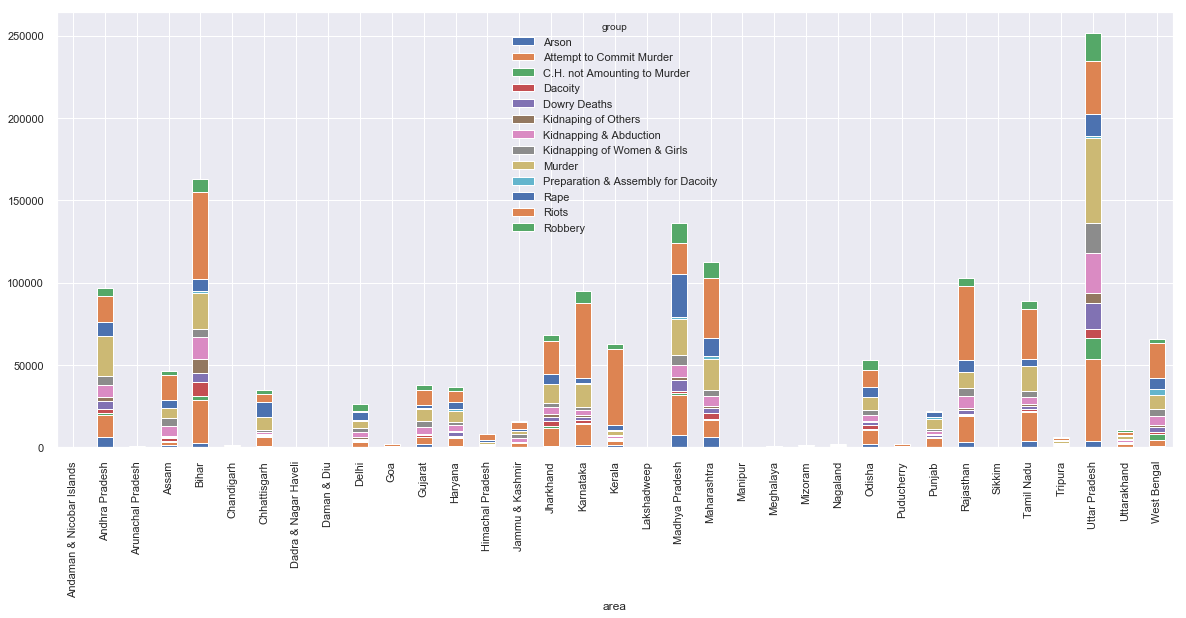

In [39]:
#plotting Stacked bar graph

vc_new_plot = vc_new.groupby(["area", "group"])['trial_total'].sum().unstack('group').fillna(0)
vc_new_plot.plot(kind='bar', stacked=True,figsize=(20,8) )

> Totals of each Column

In [40]:
totals = vc_new[['trail_by_confession','trial_by_trial','trial_total']]   #totals of selected columns
totals.sum(axis = 0) 

trail_by_confession      23023
trial_by_trial         1528413
trial_total            1551436
dtype: int64

In [41]:
total_each_year = vc_new.groupby(['year',])['trial_total'].sum().reset_index()          #grouping
total_each_year = total_each_year.sort_values(by = ['trial_total','year'], ascending=False)           #sorting
total_each_year

,year,trial_total
1,2002,164303
5,2006,162450
3,2004,159429
4,2005,158231
2,2003,157952
9,2010,156926
0,2001,153929
6,2007,151792
7,2008,151365
8,2009,135059


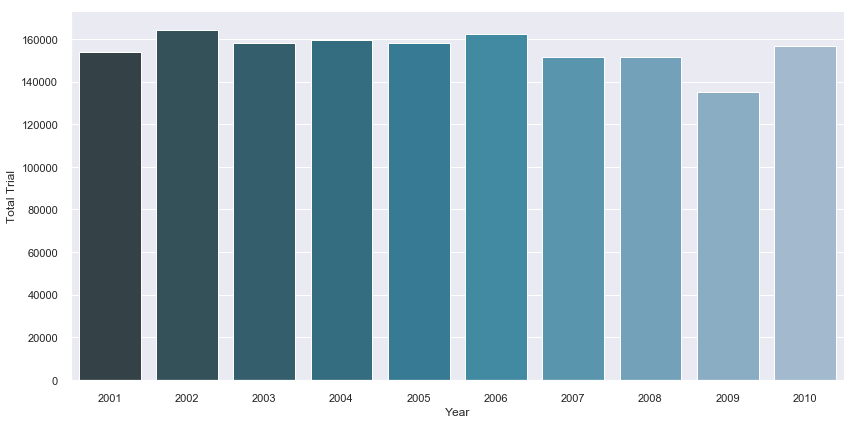

In [42]:
#Catplot for each year

sns.catplot("year", "trial_total", data=total_each_year, kind="bar" ,palette="PuBuGn_d",height=6, aspect=2)
plt.xlabel('Year')
plt.ylabel('Total Trial')
plt.show()

In [43]:
#filter by area & sort by total

total_each_state = vc_new.groupby(['area'])['trial_total'].sum().reset_index()
total_each_state = total_each_state.sort_values(by = ['trial_total','area'], ascending=False)
total_each_state

,area,trial_total
32,Uttar Pradesh,251518
4,Bihar,163079
19,Madhya Pradesh,136236
20,Maharashtra,112498
28,Rajasthan,102680
1,Andhra Pradesh,96528
16,Karnataka,94670
30,Tamil Nadu,88825
15,Jharkhand,68018
34,West Bengal,65471


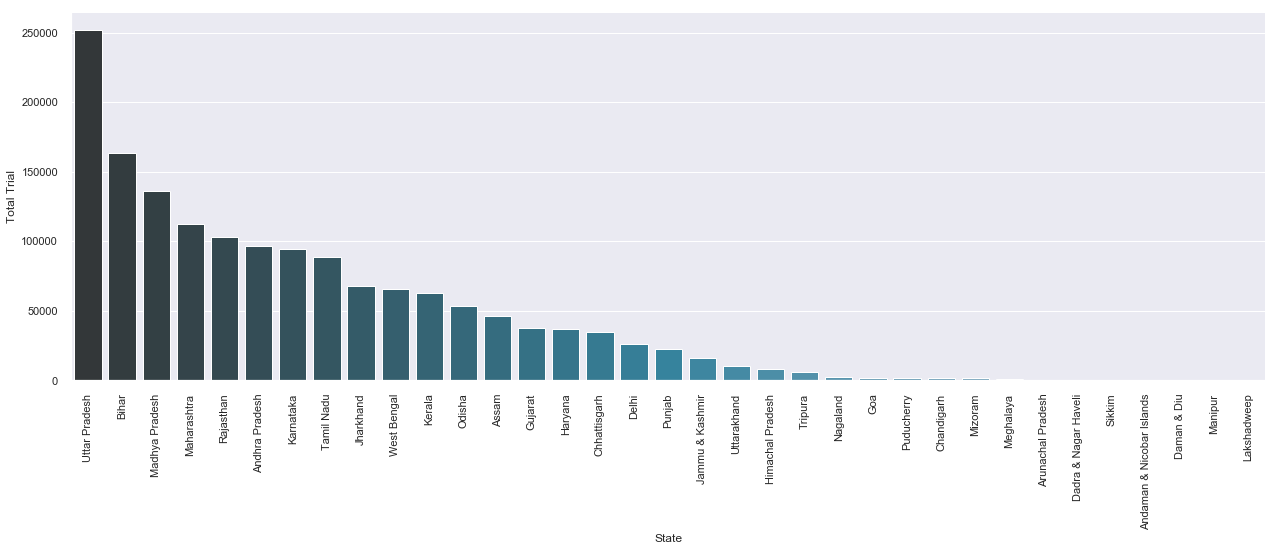

In [44]:
#catplot for area vs trials

sns.catplot("area", "trial_total", data=total_each_state, kind="bar" ,palette="PuBuGn_d",height=6, aspect=3)
plt.xlabel('State')
plt.ylabel('Total Trial')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [45]:
#filter by group & sort by total

total_each_group = vc_new.groupby(['group'])['trial_total'].sum().reset_index()
total_each_group= total_each_group.sort_values(by = ['trial_total','group'], ascending=False)
total_each_group

,group,trial_total
11,Riots,424314
8,Murder,253371
1,Attempt to Commit Murder,224803
10,Rape,136338
6,Kidnapping & Abduction,112806
12,Robbery,100579
7,Kidnapping of Women & Girls,79104
4,Dowry Deaths,55513
0,Arson,48934
3,Dacoity,38185


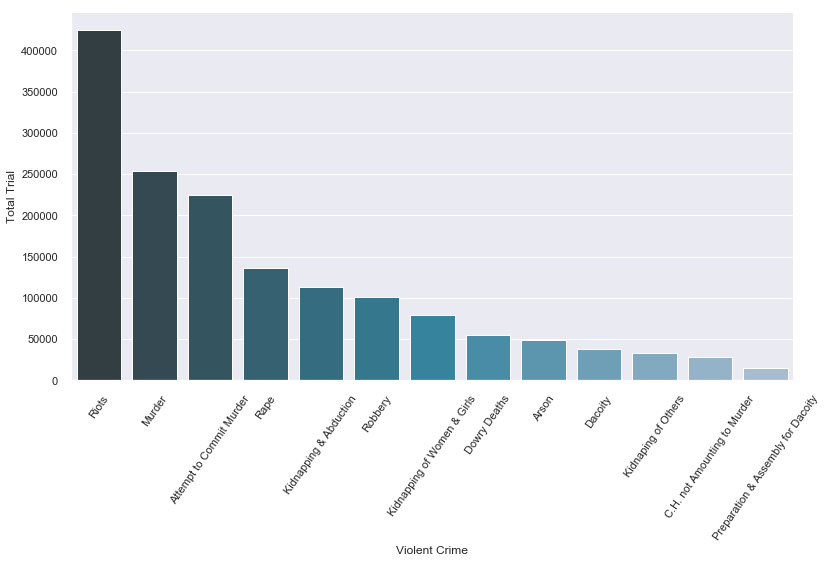

In [89]:
#catplot for group

sns.catplot("group", "trial_total", data=total_each_group, kind="bar" ,palette="PuBuGn_d",height=6, aspect=2)
plt.xlabel('Violent Crime')
plt.ylabel('Total Trial')
locs, labels = plt.xticks()
plt.setp(labels, rotation=55)
plt.show()

In [47]:
#filter by group and sort by confession 

total_by_confession = vc_new.groupby(['group'])['trail_by_confession'].sum().reset_index()
total_by_confession = total_by_confession.sort_values(by = ['trail_by_confession','group'], ascending=False)
total_by_confession

,group,trail_by_confession
11,Riots,5612
8,Murder,5080
10,Rape,2938
1,Attempt to Commit Murder,2827
6,Kidnapping & Abduction,1728
7,Kidnapping of Women & Girls,1250
12,Robbery,1238
0,Arson,642
5,Kidnaping of Others,478
4,Dowry Deaths,429


<div class="alert alert-success">
    
Basic Overall Summary for year 2001-2010
- Total trails byconfession:      23,023
- Total trials by trials:         1,528,413
- Overall trials:            1,551,436
- 2002 had highest trials: 164,303
- 2009 had lowest trials: 135,059
- Uttar Pradesh	had highest trials: 251,518
- Lakshadweep had lowest trials: 15
- Riots had highest trials: 424,314
- Preparation & Assembly for Dacoity had lowest trials: 149,89
- Riots had highest trials by confession: 5612
- Preparation & Assembly for Dacoity had lowest trials by confession: 5612

<div class="alert alert-block alert-info">

- **Exploration #1**
    
**Top 20 Violent Crimes Total trials in last 10 years**


In [48]:
#sort and filter top 20 VC trials

vc_top20 = vc_new.nlargest(20,'trial_total').head(20)
vc_top20_sort = vc_top20.groupby(['group','area','year'])['trial_total'].sum().reset_index()     #Sorting with year and group
vc_top20_sort

,group,area,year,trial_total
0,Attempt to Commit Murder,Uttar Pradesh,2001,5338
1,Attempt to Commit Murder,Uttar Pradesh,2002,6372
2,Attempt to Commit Murder,Uttar Pradesh,2004,5576
3,Attempt to Commit Murder,Uttar Pradesh,2005,5814
4,Murder,Uttar Pradesh,2001,5523
5,Murder,Uttar Pradesh,2002,6811
6,Murder,Uttar Pradesh,2003,5991
7,Murder,Uttar Pradesh,2004,5834
8,Murder,Uttar Pradesh,2006,5526
9,Riots,Bihar,2003,5585


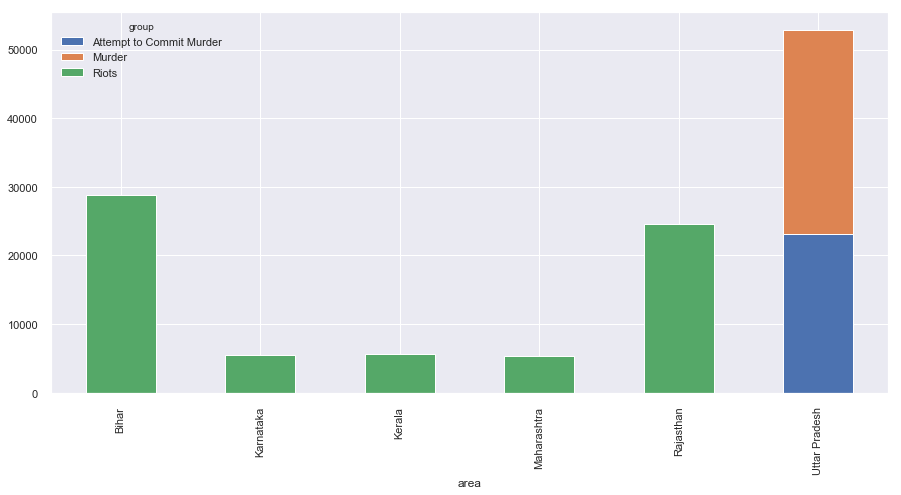

In [49]:
#stacked bar for VC vs area

vc_top20_plot = vc_top20.groupby(['group', 'area'])['trial_total'].sum().unstack('group').fillna(0)
vc_top20_plot.plot(kind='bar', stacked=True,figsize=(15,7) )

Text(0.5, 1.0, 'Trial distribution using FacetGrid')

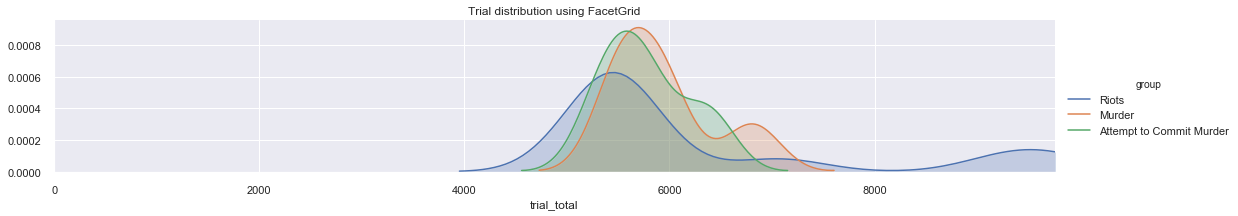

In [50]:
#Trial Distribution using Facetgrid 

as_fig = sns.FacetGrid(vc_top20,hue='group',aspect=5)

as_fig.map(sns.kdeplot,'trial_total',shade=True)

Trial = vc_top20['trial_total'].max()

as_fig.set(xlim=(0,Trial))

as_fig.add_legend()
plt.title('Trial distribution using FacetGrid')

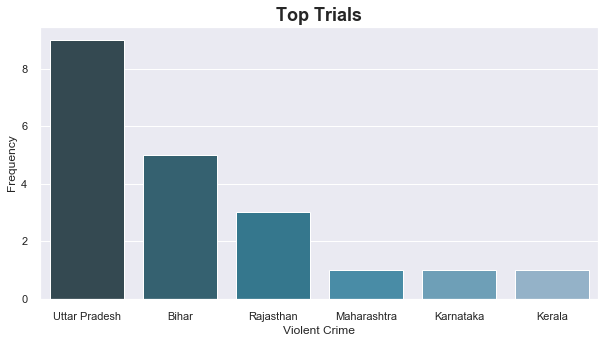

In [51]:
#Areas with most trials

plt.figure(figsize=(10,5))
sns.countplot('area',data = vc_top20, order = vc_top20['area'].value_counts().index,palette="PuBuGn_d")
plt.title("Top Trials",fontsize=18,fontweight="bold")
plt.xlabel('Violent Crime')
plt.ylabel('Frequency')
plt.show()

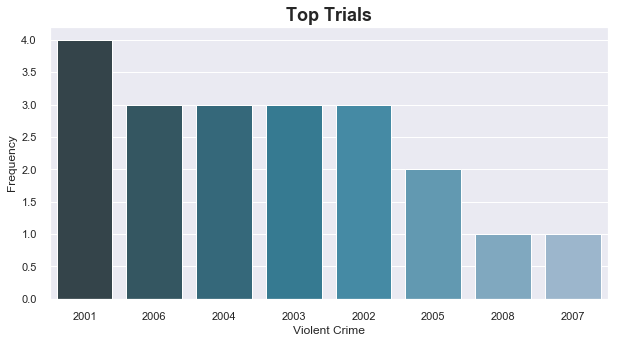

In [52]:
#catplot for years

plt.figure(figsize=(10,5))
sns.countplot('year',data = vc_top20, order = vc_top20['year'].value_counts().index,palette="PuBuGn_d")
plt.title("Top Trials",fontsize=18,fontweight="bold")
plt.xlabel('Violent Crime')
plt.ylabel('Frequency')
plt.show()

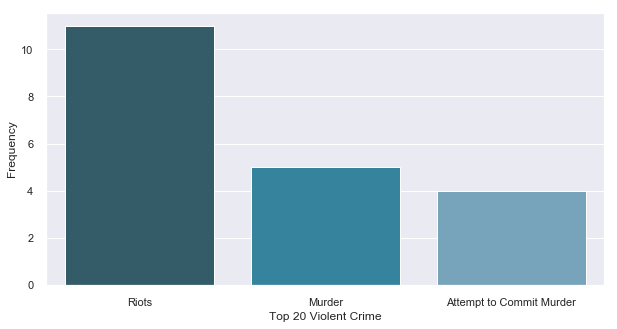

In [53]:
#type of type of trials

plt.figure(figsize=(10,5))
sns.countplot('group',data = vc_top20, order = vc_top20['group'].value_counts().index,palette="PuBuGn_d")
plt.xlabel('Top 20 Violent Crime')
plt.ylabel('Frequency')
plt.show()

<div class="alert alert-success">
    
**Observation from top 20 Violent Crime Trials**

- Uttar Pradesh is rank 1 with with more than 50,000 trials and highest in frequency with murder and attempt to murder
- Riots had high frequency
- Year 2001 had highest frequency

<div class="alert alert-block alert-info">

- **Exploration #2**   

**Each year which is the top most area had highest crime trails**

In [54]:
#filter sort via year and total

vc_filter = vc_new[['year','area','group','trial_total']]
vc_sort = vc_filter.sort_values('trial_total',ascending=False)
vc_sort.head(10)

,year,area,group,trial_total
3495,2001,Rajasthan,Riots,9757
3529,2002,Rajasthan,Riots,9277
3675,2007,Bihar,Riots,7067
2591,2002,Uttar Pradesh,Murder,6811
384,2002,Uttar Pradesh,Attempt to Commit Murder,6372
2625,2003,Uttar Pradesh,Murder,5991
2659,2004,Uttar Pradesh,Murder,5834
486,2005,Uttar Pradesh,Attempt to Commit Murder,5814
3540,2003,Bihar,Riots,5585
3654,2006,Kerala,Riots,5584


In [55]:
#delete dupe years to get unique values

vc_each_year = vc_sort.drop_duplicates(subset ='year')
vc_each_year.sort_values('year',ascending=True).head(15)

,year,area,group,trial_total
3495,2001,Rajasthan,Riots,9757
3529,2002,Rajasthan,Riots,9277
2625,2003,Uttar Pradesh,Murder,5991
2659,2004,Uttar Pradesh,Murder,5834
486,2005,Uttar Pradesh,Attempt to Commit Murder,5814
3654,2006,Kerala,Riots,5584
3675,2007,Bihar,Riots,7067
3723,2008,Maharashtra,Riots,5291
3741,2009,Bihar,Riots,4725
3788,2010,Kerala,Riots,5103


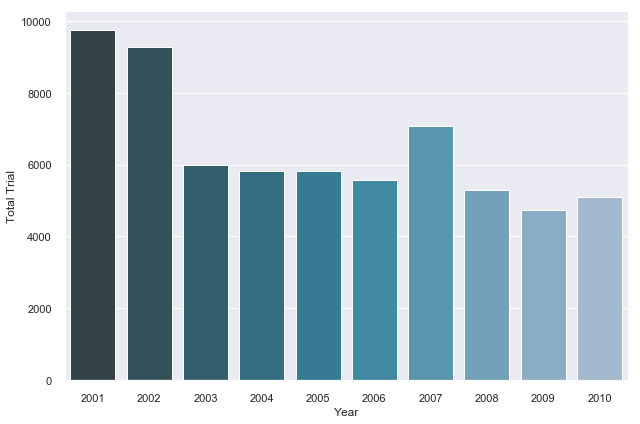

In [56]:
#catplot for years

sns.catplot("year", "trial_total", data=vc_each_year, kind="bar" ,palette="PuBuGn_d",height=6, aspect=1.5)
plt.xlabel('Year')
plt.ylabel('Total Trial')
plt.show()

In [57]:
vc_each_year.group.mode()                  #most common type of VC trial

0    Riots
dtype: object

In [58]:
vc_each_year.area.mode()              #most common state of VC trial

0    Uttar Pradesh
dtype: object

<div class="alert alert-success">
    
**Observations from each year where top most area had highest crime trails**

- Year 2001 had  highest trials, follow by 2002 & 2007
- Most recurring state with trials was Uttar Pradesh 
- Most recurring crime trials were Riots 


<div class="alert alert-block alert-info">

- **Exploration #3**
    
**Exploration of top violent crime trials: Riots**

In [59]:
#filter by Riots

vc_riots = vc_new[vc_new['group']=='Riots'] 

vc_filter = vc_riots[['year','area','group','trial_total']]
vc_sort = vc_filter.sort_values('trial_total',ascending=False)
vc_sort.head(10)

,year,area,group,trial_total
3495,2001,Rajasthan,Riots,9757
3529,2002,Rajasthan,Riots,9277
3675,2007,Bihar,Riots,7067
3540,2003,Bihar,Riots,5585
3654,2006,Kerala,Riots,5584
3562,2003,Rajasthan,Riots,5514
3485,2001,Karnataka,Riots,5499
3641,2006,Bihar,Riots,5417
3573,2004,Bihar,Riots,5398
3607,2005,Bihar,Riots,5305


In [60]:
riots_total_each_year = vc_riots.groupby(['year'])['trial_total'].sum().reset_index()
riots_total_each_year = riots_total_each_year.sort_values(by = ['trial_total','year'], ascending=False)
riots_total_each_year

,year,trial_total
0,2001,48608
1,2002,48181
2,2003,44260
5,2006,43286
3,2004,42058
4,2005,41553
7,2008,41435
9,2010,40876
6,2007,39350
8,2009,34707


**Year with most Riots trials**

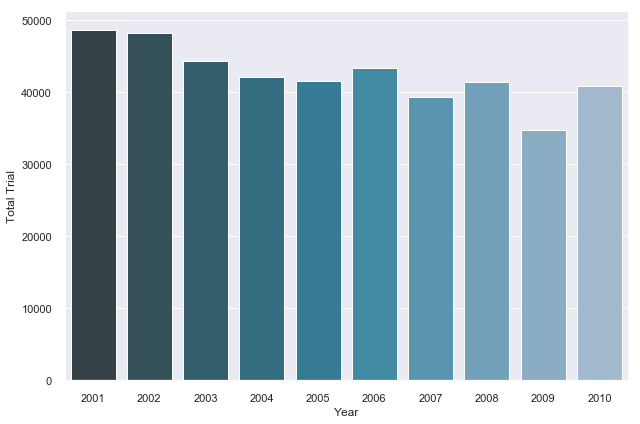

In [61]:
sns.catplot("year", "trial_total", data=riots_total_each_year, kind="bar" ,palette="PuBuGn_d",height=6, aspect=1.5)
plt.xlabel('Year')
plt.ylabel('Total Trial')
plt.show()

**State with most Riots trials**

In [62]:
riots_total_each_state = vc_riots.groupby(['area'])['trial_total'].sum().reset_index()
riots_total_each_state = riots_total_each_state.sort_values(by = ['trial_total','area'], ascending=False)
riots_total_each_state

,area,trial_total
4,Bihar,52886
17,Kerala,46276
16,Karnataka,45390
28,Rajasthan,45080
20,Maharashtra,36414
32,Uttar Pradesh,32183
30,Tamil Nadu,30229
34,West Bengal,21401
15,Jharkhand,19593
19,Madhya Pradesh,18533


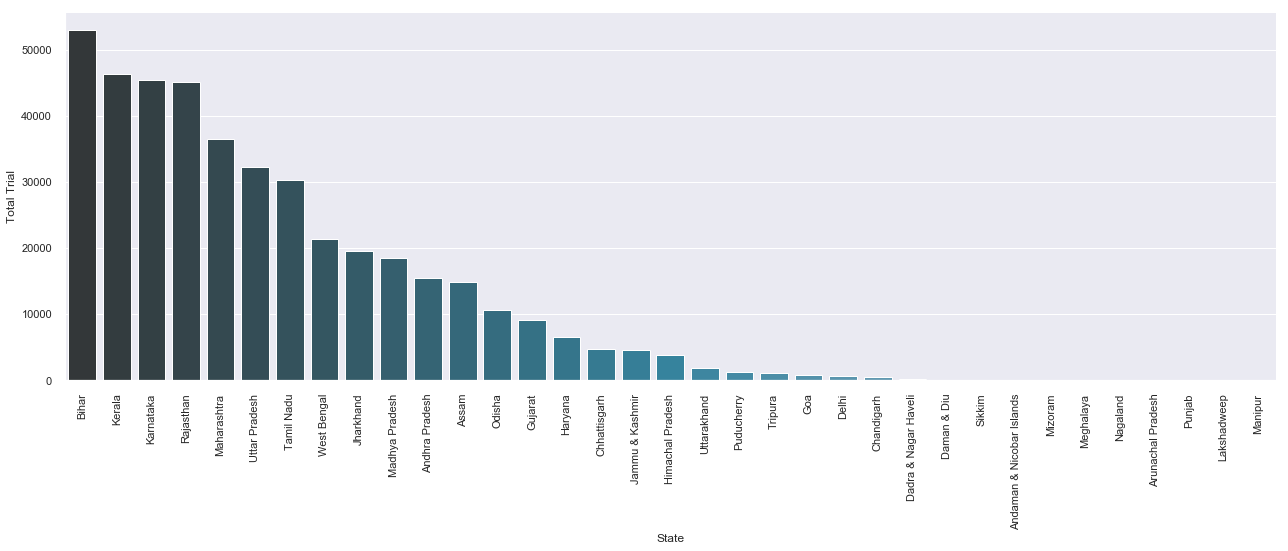

In [63]:
sns.catplot("area", "trial_total", data=riots_total_each_state, kind="bar" ,palette="PuBuGn_d",height=6, aspect=3)
plt.xlabel('State')
plt.ylabel('Total Trial')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [64]:
vc_riots.trail_by_confession.sum()

5612

In [65]:
vc_riots.trial_by_trial.sum()

418702

<div class="alert alert-success">
    
**Observations from top trials violent crime: Riots**

- Year 2001 and 2002 had most trials, 2009 was the lowest
- Bihar was the state which had most Riots trials, follow by Kerla, Karnataka & Rajasthan
- Total by confession were: 5,612
- Total by Trial were: 418,702

<div class="alert alert-block alert-info">

- **Exploration #4**
    
**Exploration by year which had most number of trials of Violent Crime**

In [66]:
#filter by year

vc_2002 = vc_new[vc_new['year']=='2002'] 

vc_filter = vc_2002[['year','area','group','trial_total']]
vc_sort = vc_filter.sort_values('trial_total',ascending=True)
vc_sort.head(10)

C:\Python\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,year,area,group,trial_total


In [67]:
#error while filtering integer value, converting to string and then filter

import numpy as np
np.arange(5) == np.arange(5).astype(str)    #FutureWarning thrown here

C:\Python\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


False

In [68]:
#error while filtering integer value, converting to string and then filter

vc_new['year'] = vc_new['year'].astype(str)

In [69]:
vc_2002 = vc_new[vc_new['year'] == '2002']             #2002 filter success

In [70]:
vc_2002.head(10)        

,area,year,group,sub_group,trail_by_confession,trial_by_trial,trial_total
30,Andaman & Nicobar Islands,2002,Arson,Arson,0,1,1
31,Andhra Pradesh,2002,Arson,Arson,0,499,499
32,Assam,2002,Arson,Arson,5,125,130
33,Bihar,2002,Arson,Arson,0,148,148
34,Chandigarh,2002,Arson,Arson,0,1,1
35,Chhattisgarh,2002,Arson,Arson,30,55,85
36,Dadra & Nagar Haveli,2002,Arson,Arson,0,1,1
37,Daman & Diu,2002,Arson,Arson,0,0,0
38,Delhi,2002,Arson,Arson,0,3,3
39,Goa,2002,Arson,Arson,0,18,18


In [71]:
vc_filter = vc_2002[['year','area','group','trial_total']]
vc_sort = vc_filter.sort_values('trial_total',ascending=False)
vc_sort.head(10)

,year,area,group,trial_total
3529,2002,Rajasthan,Riots,9277
2591,2002,Uttar Pradesh,Murder,6811
384,2002,Uttar Pradesh,Attempt to Commit Murder,6372
3506,2002,Bihar,Riots,4593
3518,2002,Karnataka,Riots,4532
3531,2002,Tamil Nadu,Riots,4293
3533,2002,Uttar Pradesh,Riots,4259
3519,2002,Kerala,Riots,3740
3522,2002,Maharashtra,Riots,3400
2560,2002,Andhra Pradesh,Murder,2645


In [72]:
year_2002_total_each_state = vc_2002.groupby(['area'])['trial_total'].sum().reset_index()
year_2002_total_each_state = year_2002_total_each_state.sort_values(by = ['trial_total','area'], ascending=False)
year_2002_total_each_state

,area,trial_total
32,Uttar Pradesh,30761
28,Rajasthan,17857
19,Madhya Pradesh,12715
4,Bihar,12319
20,Maharashtra,11969
30,Tamil Nadu,10875
1,Andhra Pradesh,10140
16,Karnataka,8535
15,Jharkhand,7004
34,West Bengal,6551


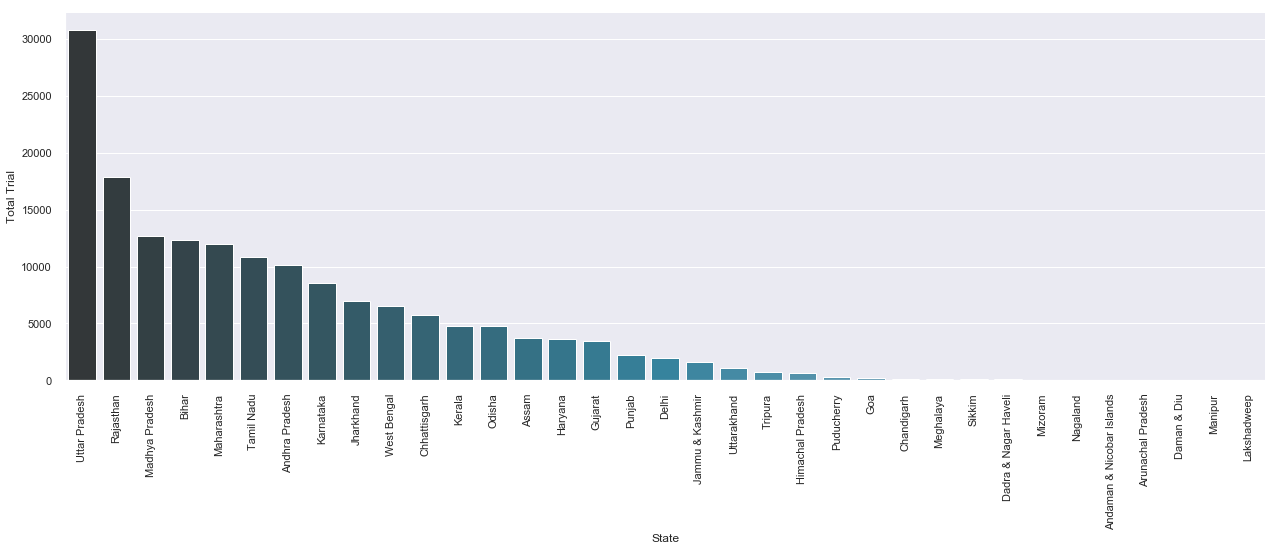

In [73]:
#catplot for state

sns.catplot("area", "trial_total", data=year_2002_total_each_state, kind="bar" ,palette="PuBuGn_d",height=6, aspect=3)
plt.xlabel('State')
plt.ylabel('Total Trial')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

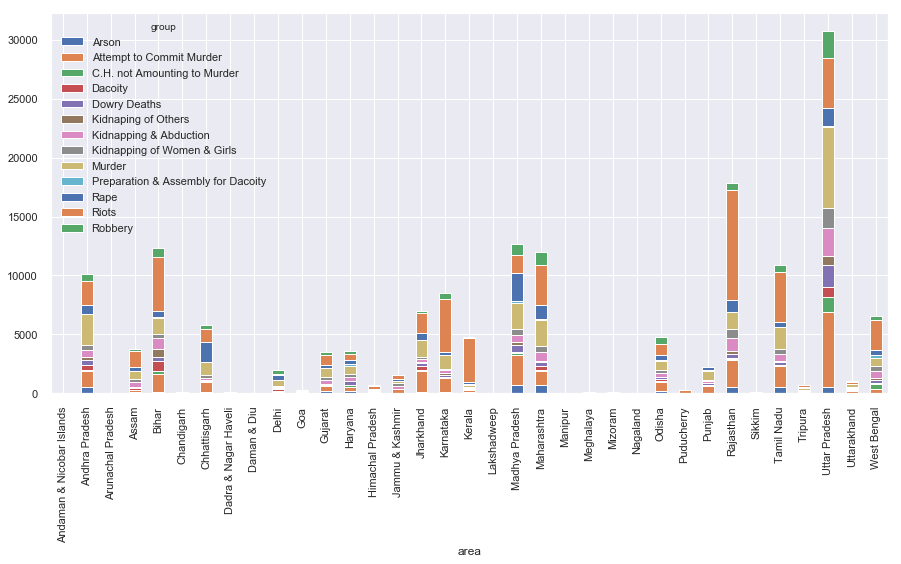

In [74]:
#Stacked bar for state

year_2002_total_each_state = vc_2002.groupby(['area',"group"])['trial_total'].sum().reset_index()
year_2002_total_each_state = year_2002_total_each_state.sort_values(by = ['trial_total','area'], ascending=False)
year_2002_total = year_2002_total_each_state.groupby(['group', 'area'])['trial_total'].sum().unstack('group').fillna(0)
year_2002_total.plot(kind='bar', stacked=True,figsize=(15,7) )

In [75]:
year_2002_total_each_group = vc_2002.groupby(['group'])['trial_total'].sum().reset_index()
year_2002_total_each_group = year_2002_total_each_group.sort_values(by = ['trial_total','group'], ascending=False)
year_2002_total_each_group

,group,trial_total
11,Riots,48181
8,Murder,27917
1,Attempt to Commit Murder,24490
10,Rape,13443
6,Kidnapping & Abduction,10591
12,Robbery,10304
7,Kidnapping of Women & Girls,7353
4,Dowry Deaths,5492
0,Arson,5030
3,Dacoity,4364


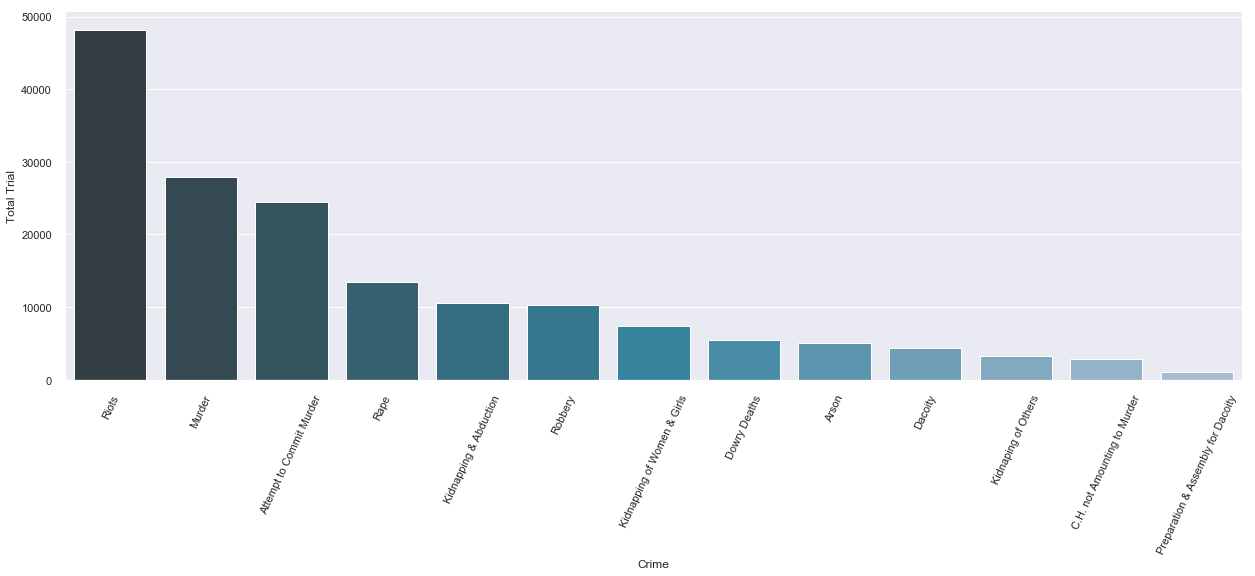

In [76]:
sns.catplot("group", "trial_total", data=year_2002_total_each_group, kind="bar" ,palette="PuBuGn_d",height=6, aspect=3)
plt.xlabel('Crime')
plt.ylabel('Total Trial')
locs, labels = plt.xticks()
plt.setp(labels, rotation=65)
plt.show()

In [77]:
vc_2002.trail_by_confession.sum()

3921

In [78]:
vc_2002.trial_by_trial.sum()

160382

<div class="alert alert-success">
    
**Observations from year 2002 which had most number of trials of Violent Crime**

- Uttar Pradesh was the state which had most  trials, follow by Rajasthan and Madhya Pradesh
- Bihar was the state which had most Riots trials, follow by Kerla, Karnataka & Rajasthan
- Total by confession were: 3,921
- Total by Trial were: 160,382

<div class="alert alert-block alert-info">

- **Exploration #5**
    
**Exploration of top state which had most trials of Violent Crime ("Uttar Pradesh)**

In [90]:
#Filter by Uttar Pradesh

vc_up = vc_new[vc_new['area']=='Uttar Pradesh'] 

vc_filter = vc_up[['year','area','group','trial_total']]
vc_sort = vc_filter.sort_values('trial_total',ascending=False)
vc_sort.head(10)

,year,area,group,trial_total
2591,2002,Uttar Pradesh,Murder,6811
384,2002,Uttar Pradesh,Attempt to Commit Murder,6372
2625,2003,Uttar Pradesh,Murder,5991
2659,2004,Uttar Pradesh,Murder,5834
486,2005,Uttar Pradesh,Attempt to Commit Murder,5814
452,2004,Uttar Pradesh,Attempt to Commit Murder,5576
2727,2006,Uttar Pradesh,Murder,5526
2556,2001,Uttar Pradesh,Murder,5523
350,2001,Uttar Pradesh,Attempt to Commit Murder,5338
519,2006,Uttar Pradesh,Attempt to Commit Murder,5250


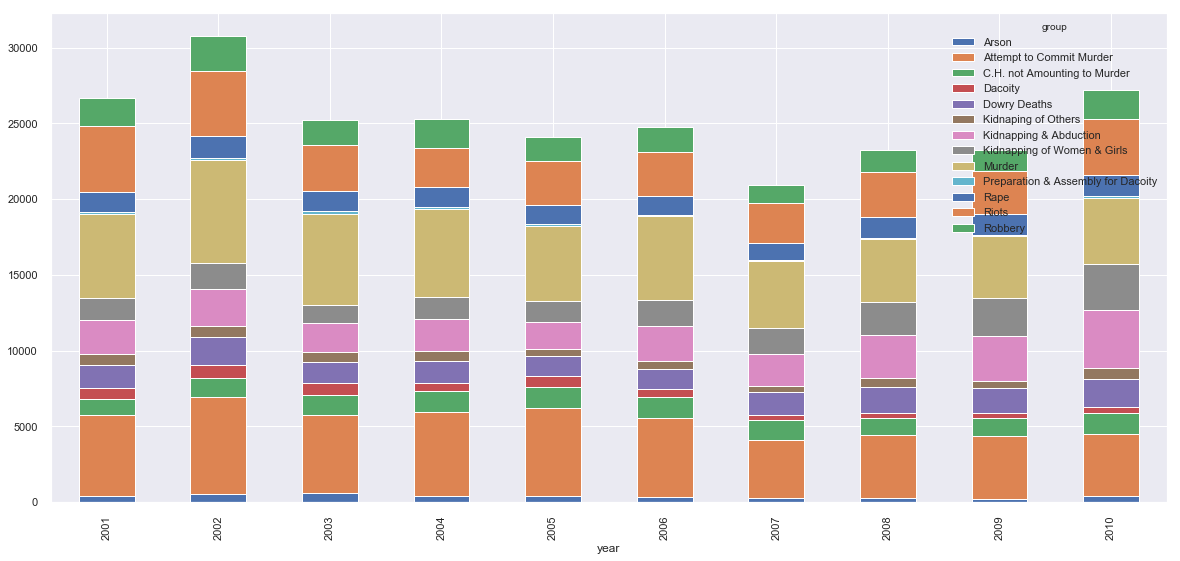

In [80]:
vc_up_total_each_year = vc_up.groupby(['year',"group"])['trial_total'].sum().reset_index()
vc_up_total_each_year = vc_up_total_each_year.sort_values(by = ['trial_total','year'], ascending=False)
vc_up_total = vc_up_total_each_year.groupby(['year', 'group'])['trial_total'].sum().unstack('group').fillna(0)
vc_up_total.plot(kind='bar', stacked=True,figsize=(20,9) )

In [81]:
vc_up_year = vc_up.groupby(['year'])['trial_total'].sum().reset_index()
vc_up__each_year = vc_up_year.sort_values(by = ['trial_total','year'], ascending=False)
vc_up__each_year

,year,trial_total
1,2002,30761
9,2010,27182
0,2001,26693
3,2004,25270
2,2003,25253
5,2006,24745
4,2005,24116
7,2008,23273
8,2009,23264
6,2007,20961


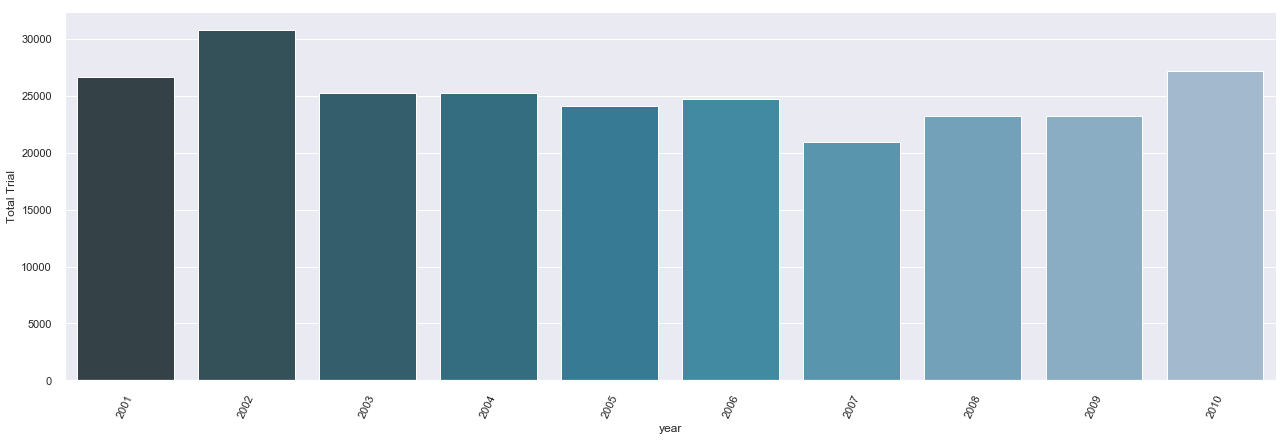

In [82]:
sns.catplot("year", "trial_total", data=vc_up__each_year, kind="bar" ,palette="PuBuGn_d",height=6, aspect=3)
plt.xlabel('year')
plt.ylabel('Total Trial')
locs, labels = plt.xticks()
plt.setp(labels, rotation=65)
plt.show()

In [83]:
vc_up_group = vc_up.groupby(['group'])['trial_total'].sum().reset_index()
vc_up_each_group = vc_up_group.sort_values(by = ['trial_total','group'], ascending=False)
vc_up_each_group

,group,trial_total
8,Murder,51635
1,Attempt to Commit Murder,49782
11,Riots,32183
6,Kidnapping & Abduction,24473
7,Kidnapping of Women & Girls,18411
12,Robbery,16917
4,Dowry Deaths,15557
10,Rape,13172
2,C.H. not Amounting to Murder,12758
5,Kidnaping of Others,6062


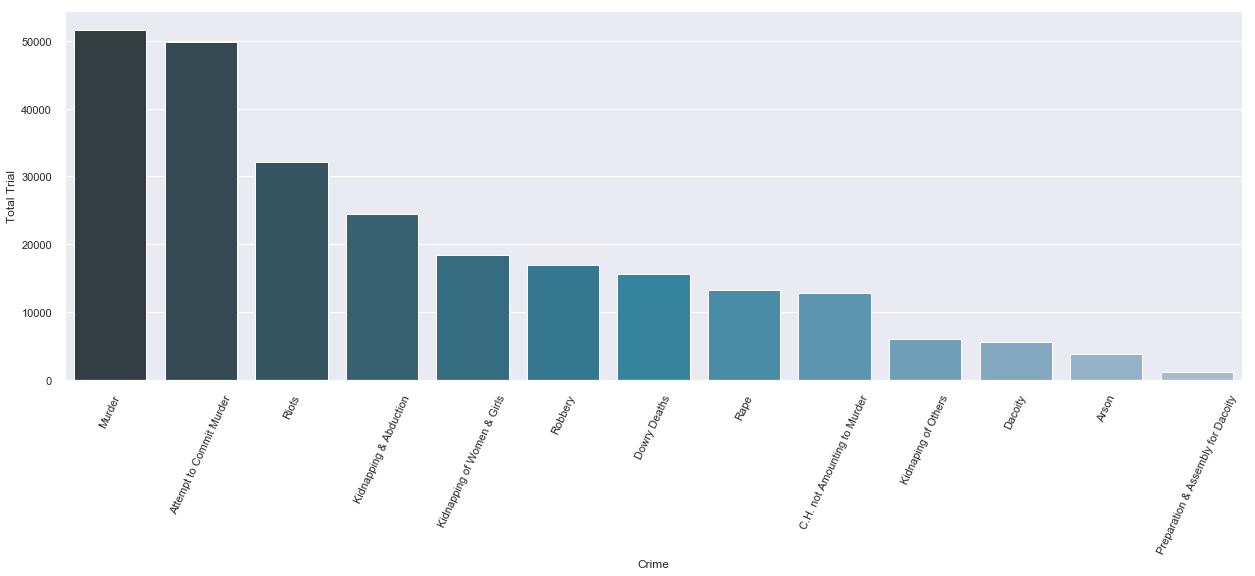

In [84]:
sns.catplot("group", "trial_total", data=vc_up_each_group, kind="bar" ,palette="PuBuGn_d",height=6, aspect=3)
plt.xlabel('Crime')
plt.ylabel('Total Trial')
locs, labels = plt.xticks()
plt.setp(labels, rotation=65)
plt.show()

In [85]:
vc_up.trail_by_confession.sum()

170

In [86]:
vc_up.trial_by_trial.sum()

251348

<div class="alert alert-success">
    
**Observations from of top state which had most trials of Violent Crime ("Uttar Pradesh)**

- Year 2002 and 2010 had most trials, 2007 was the lowest
- Murder and attempt to murder were the top trials
- Total by confession were: 170
- Total by Trial were: 251,348


# Final Summary
<div class="alert alert-success">
    
**While exploring Annual data (State/UT wise) data of Trial's of Violent Crimes by Courts in granularity: Time period: 2001 - 2010**

**Following are the observations**

- Overall trials: 155143
- 2002 had highest trials: 164303
- 2009 had lowest trials: 135059
- Uttar Pradesh had highest trials in 10 years: 251518
- Lakshadweep had lowest trials: 15
- Riots had highest trials: 424314
- Year 2001 Rajasthan is # 1 in crime trials with total of 9757

**In exploration of top violent crime trials: Riots; we noted following:**
- Year 2001 and 2002 had most trials, 2009 was the lowest
- Bihar was the state which had most Riots trials, follow by Kerla, Karnataka & Rajasthan

**In exploration by year, which had most number of trials of Violent Crime (2002); we noted following:**
- Uttar Pradesh was the state which had most trials, follow by Rajasthan and Madhya Pradesh
- Bihar was the state which had most Riots trials, follow by Kerla, Karnataka & Rajasthan

**In exploration of top state which had most trials of Violent Crime ("Uttar Pradesh)**
- Year 2002 and 2010 had most trials, 2007 was the lowest
- Murder and attempt to murder were the top trials




<div class="alert alert-warning">
    
    **Just for Fun**

In [87]:
vc_addon = vc_new.groupby(['area','trial_total'])['trail_by_confession'].sum().reset_index()
vc_addon_1 = vc_addon.sort_values(by = ['trail_by_confession','area','trial_total'], ascending=False)
vc_addon_1.sample()

,area,trial_total,trail_by_confession
510,Chhattisgarh,503,154


In [88]:
vc_addon_1['percent'] = vc_addon_1.groupby('area').apply(lambda s: s.trail_by_confession.nunique()/s.trial_total).values
vc_addon_1.head()


,area,trial_total,trail_by_confession,percent
535,Chhattisgarh,1130,688,0.062500
536,Chhattisgarh,1666,586,0.083333
529,Chhattisgarh,865,502,0.090909
534,Chhattisgarh,1118,406,0.111111
533,Chhattisgarh,962,398,0.125000


<div class="alert alert-success">
    
**Honest criminals trials were from Chhattisgarh**